In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models_tree import FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
                     header=None)  # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape

((506, 12), (506,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

In [5]:
# Initialize and train FONN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Increased hidden layer size
output_dim = 1
# num_trees_input = 10
num_trees_input = 5
epochs = 40000  # Increased number of epochs
learning_rate = 0.0001  # Decreased learning rate

start_time = time.time()
fonn1 = FONN1(input_dim, hidden_dim, output_dim,
              num_trees_input, X_train, y_train)
fonn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn1_train_time = end_time - start_time

sample: 0 {'Variables Used': {0, 2, 4, 5, 7, 9, 10, 11}, 'Number of Terminal Nodes': 21, 'Total Error': 16398.67466886241, 'Residual Mean Deviance': 780.8892699458291, 'Samples': 404, 'Sum of Squared Residuals': 4329718.294760849}
sample: 1 {'Variables Used': {0, 4, 5, 6, 7, 9, 10, 11}, 'Number of Terminal Nodes': 27, 'Total Error': 23686.255921202308, 'Residual Mean Deviance': 877.2687378223077, 'Samples': 404, 'Sum of Squared Residuals': 6940453.760766746}
sample: 2 {'Variables Used': {0, 2, 4, 5, 6, 7, 10, 11}, 'Number of Terminal Nodes': 25, 'Total Error': 13381.270453954427, 'Residual Mean Deviance': 535.250818158177, 'Samples': 404, 'Sum of Squared Residuals': 3858048.7263246803}
sample: 3 {'Variables Used': {0, 2, 4, 5, 6, 7, 10, 11}, 'Number of Terminal Nodes': 23, 'Total Error': 14968.397737520554, 'Residual Mean Deviance': 650.7999016313285, 'Samples': 404, 'Sum of Squared Residuals': 4286267.50825364}
sample: 4 {'Variables Used': {0, 2, 4, 5, 6, 7, 9, 10, 11}, 'Number of Ter

In [6]:
# Initialize and train FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.001

start_time = time.time()
fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden)
fonn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn2_train_time = end_time - start_time

Epoch 0, Loss: 660.5910716820633
Epoch 100, Loss: 15.049389048595721
Epoch 200, Loss: 11.961606655068342
Epoch 300, Loss: 9.556678431049896
Epoch 400, Loss: 11.274060163138484
Epoch 500, Loss: 9.144408893822987
Epoch 600, Loss: 8.748521907213497
Epoch 700, Loss: 8.281716214925279
Epoch 800, Loss: 8.46071483017598
Epoch 900, Loss: 8.369395294515284


In [7]:
# Initialize and train TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Hidden layer size
output_dim = 1
epochs = 40000  # Number of epochs
learning_rate = 0.0001  # Learning rate

start_time = time.time()
treenn1 = TREENN1(input_dim, hidden_dim, output_dim, X_train, y_train)
treenn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn1_train_time = end_time - start_time

sample: 0 {'Variables Used': {0, 1, 4, 5, 6, 7, 9, 11}, 'Number of Terminal Nodes': 24, 'Total Error': 15604.234151198307, 'Residual Mean Deviance': 650.1764229665961, 'Samples': 404, 'Sum of Squared Residuals': 4632252.987969753}
Epoch 0, Loss: 606.6651758050549
Epoch 100, Loss: 604.3866891323971
Epoch 200, Loss: 600.6265487011876
Epoch 300, Loss: 595.7852753269724
Epoch 400, Loss: 590.4263316104109
Epoch 500, Loss: 584.8913611525949
Epoch 600, Loss: 579.3583473619158
Epoch 700, Loss: 573.9086060998014
Epoch 800, Loss: 568.5712106125914
Epoch 900, Loss: 563.3490835649353
Epoch 1000, Loss: 558.2335089898478
Epoch 1100, Loss: 553.2118488532955
Epoch 1200, Loss: 548.2730533357054
Epoch 1300, Loss: 543.4093623253848
Epoch 1400, Loss: 538.6191360252343
Epoch 1500, Loss: 533.8884499163559
Epoch 1600, Loss: 529.2017357106433
Epoch 1700, Loss: 524.5511483296996
Epoch 1800, Loss: 519.9325708866671
Epoch 1900, Loss: 515.3436188271779
Epoch 2000, Loss: 510.7828083542413
Epoch 2100, Loss: 506.249

In [8]:
# Initialize and train TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.001

start_time = time.time()
treenn2 = TREENN2(input_dim, hidden_dim, output_dim)
treenn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn2_train_time = end_time - start_time

Epoch 0, Loss: 604.07062864306
Epoch 100, Loss: 486.23507056165835
Epoch 200, Loss: 372.9322216366014
Epoch 300, Loss: 267.7396361224067
Epoch 400, Loss: 176.9499968819768
Epoch 500, Loss: 105.44732403914216
Epoch 600, Loss: 50.941023109174736
Epoch 700, Loss: 20.347926126408634
Epoch 800, Loss: 10.900191012694194
Epoch 900, Loss: 8.336403698359527


In [9]:
# Measure computational time and evaluate the FONN1 model
start_time = time.time()
fonn1_predictions = fonn1.forward(X_test)
end_time = time.time()
fonn1_comp_time = end_time - start_time

fonn1_r2 = r2_score(y_test, fonn1_predictions)
fonn1_mae = mean_absolute_error(y_test, fonn1_predictions)
fonn1_mse = mean_squared_error(y_test, fonn1_predictions)

results["FONN1"] = {"R² Score": fonn1_r2, "MAE": fonn1_mae, "MSE": fonn1_mse,
                    "Train Time (s)": fonn1_train_time, "Comp Time (s)": fonn1_comp_time}

In [10]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
fonn2_predictions = fonn2.forward(X_test, y_test)
end_time = time.time()
fonn2_comp_time = end_time - start_time

fonn2_r2 = r2_score(y_test, fonn2_predictions)
fonn2_mae = mean_absolute_error(y_test, fonn2_predictions)
fonn2_mse = mean_squared_error(y_test, fonn2_predictions)

results["FONN2"] = {"R² Score": fonn2_r2, "MAE": fonn2_mae, "MSE": fonn2_mse,
                    "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_comp_time}

# Measure computational time and predict house prices using the decision trees in the hidden layer
start_time = time.time()
fonn2_tree_predictions = fonn2.tree_predict(X_test)
end_time = time.time()
fonn2_tree_comp_time = end_time - start_time

fonn2_tree_r2 = r2_score(y_test, fonn2_tree_predictions)
fonn2_tree_mae = mean_absolute_error(y_test, fonn2_tree_predictions)
fonn2_tree_mse = mean_squared_error(y_test, fonn2_tree_predictions)

results["Tree-based Predictions (FONN2)"] = {"R² Score": fonn2_tree_r2, "MAE": fonn2_tree_mae,
                                             "MSE": fonn2_tree_mse, "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_tree_comp_time}

In [11]:
# Combine 10 decision trees and evaluate the ensemble model
start_time = time.time()
trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(
    X_train, y_train) for i in range(10)]
end_time = time.time()
ensemble_train_time = end_time - start_time

start_time = time.time()
ensemble_predictions = np.mean(
    [tree.predict(X_test) for tree in trees], axis=0)
end_time = time.time()
ensemble_comp_time = end_time - start_time

ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

results["Ensemble of 10 Trees"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae,
                                   "MSE": ensemble_mse, "Train Time (s)": ensemble_train_time, "Comp Time (s)": ensemble_comp_time}

In [12]:
# Measure computational time and evaluate the TREENN1 model
start_time = time.time()
treenn1_predictions = treenn1.forward(X_test)
end_time = time.time()
treenn1_comp_time = end_time - start_time

treenn1_r2 = r2_score(y_test, treenn1_predictions)
treenn1_mae = mean_absolute_error(y_test, treenn1_predictions)
treenn1_mse = mean_squared_error(y_test, treenn1_predictions)

results["TREENN1"] = {"R² Score": treenn1_r2, "MAE": treenn1_mae, "MSE": treenn1_mse,
                      "Train Time (s)": treenn1_train_time, "Comp Time (s)": treenn1_comp_time}

In [13]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
treenn2_predictions = treenn2.forward(X_test, y_test)
end_time = time.time()
treenn2_comp_time = end_time - start_time

treenn2_r2 = r2_score(y_test, treenn2_predictions)
treenn2_mae = mean_absolute_error(y_test, treenn2_predictions)
treenn2_mse = mean_squared_error(y_test, treenn2_predictions)

results["TREENN2"] = {"R² Score": treenn2_r2, "MAE": treenn2_mae,
                      "MSE": treenn2_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_comp_time}

# Measure computational time and predict house prices using the decision tree in the hidden layer
start_time = time.time()
treenn2_tree_predictions = treenn2.tree_hidden.predict(treenn2.a1)
end_time = time.time()
treenn2_tree_comp_time = end_time - start_time

treenn2_tree_r2 = r2_score(y_test, treenn2_tree_predictions)
treenn2_tree_mae = mean_absolute_error(y_test, treenn2_tree_predictions)
treenn2_tree_mse = mean_squared_error(y_test, treenn2_tree_predictions)

results["Tree-based Predictions (TREENN2)"] = {"R² Score": treenn2_tree_r2, "MAE": treenn2_tree_mae,
                                               "MSE": treenn2_tree_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_tree_comp_time}

In [14]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                  R² Score       MAE        MSE  \
Linear Regression                 0.629049  3.530902  27.203240   
Ridge Regression                  0.628946  3.527434  27.210799   
Lasso Regression                  0.583928  3.797634  30.512140   
ElasticNet Regression             0.576617  3.688701  31.048308   
Bayesian Ridge Regression         0.628346  3.509389  27.254824   
ARD Regression                    0.624592  3.533442  27.530074   
SGD Regressor                     0.619623  3.569042  27.894517   
Passive Aggressive Regressor      0.447198  4.253317  40.539050   
Support Vector Regression         0.647374  2.798191  25.859432   
MLP Regressor                     0.754212  3.019009  18.024539   
Random Forest Regressor           0.886802  2.115863   8.301222   
Gradient Boosting Regressor       0.917226  1.899354   6.070106   
XGBoost Regressor                 0.900123  1.931674   7.324366   
AdaBoost Regressor                0.817881  2.495554  13.35547

Tree 0 feature importances:
[1.28737699e-02 5.85368057e-01 1.04844549e-02 9.28699105e-03
 1.45198238e-02 0.00000000e+00 4.90626142e-04 2.85093014e-01
 4.11209000e-03 7.77711737e-02]
Tree 0 structure:
|--- feature_1 <= -0.11
|   |--- feature_1 <= -0.15
|   |   |--- feature_9 <= 0.12
|   |   |   |--- value: [43.50]
|   |   |--- feature_9 >  0.12
|   |   |   |--- feature_1 <= -0.19
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_1 >  -0.19
|   |   |   |   |--- value: [48.50]
|   |--- feature_1 >  -0.15
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_3 >  0.03
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.05
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]


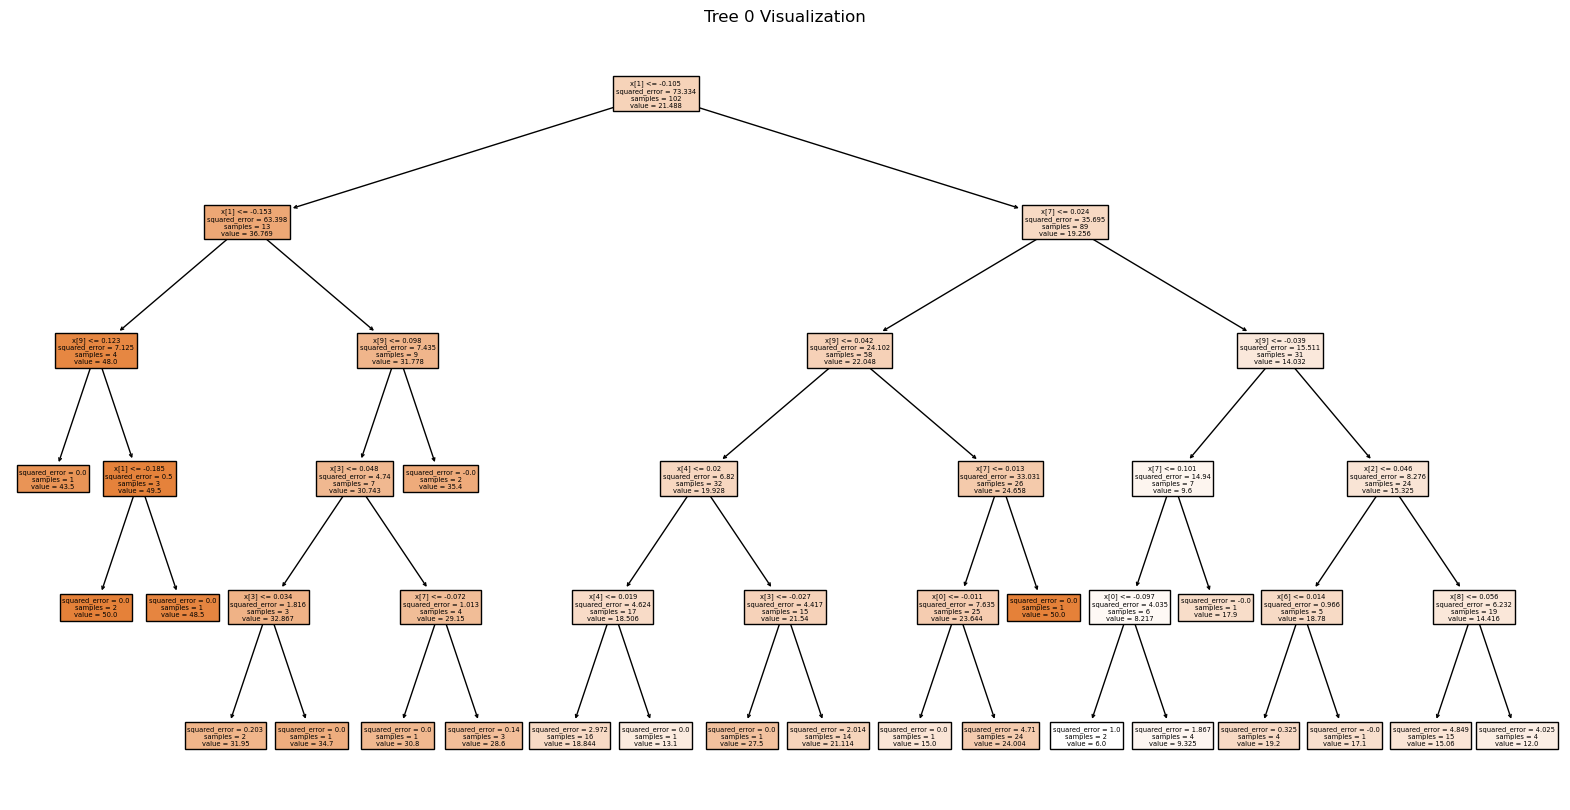

Tree 1 feature importances:
[0.01611652 0.58536806 0.01048445 0.         0.01656978 0.00375479
 0.00329316 0.28628477 0.00411209 0.07401638]
Tree 1 structure:
|--- feature_1 <= -0.11
|   |--- feature_1 <= -0.15
|   |   |--- feature_5 <= 0.04
|   |   |   |--- value: [43.50]
|   |   |--- feature_5 >  0.04
|   |   |   |--- feature_1 <= -0.19
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_1 >  -0.19
|   |   |   |   |--- value: [48.50]
|   |--- feature_1 >  -0.15
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- feature_7 <= -0.05
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_7 >  -0.05
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|--- feature_1 >  -0.11
|   |--- featur

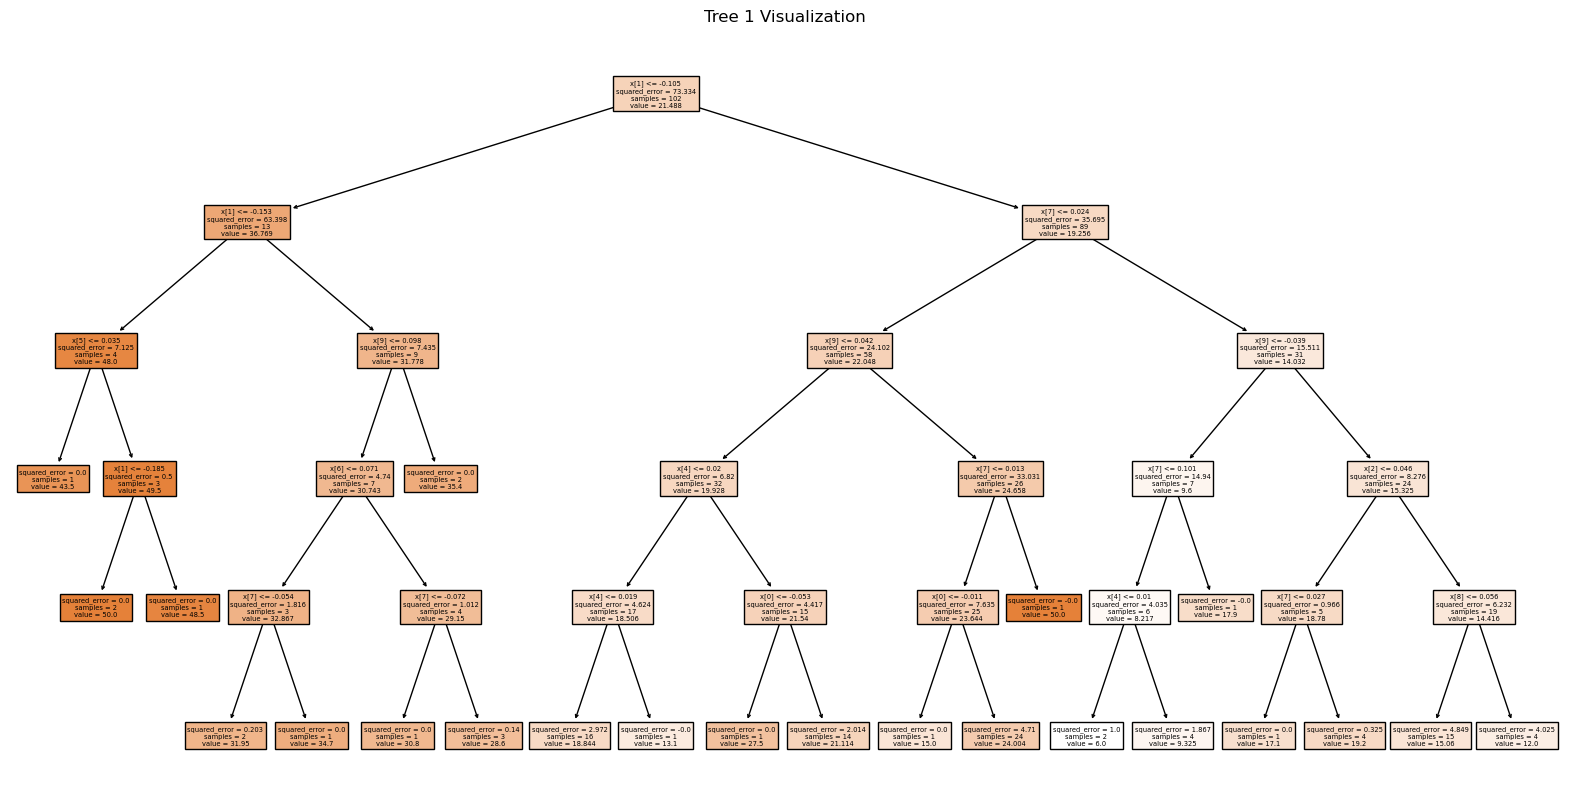

Tree 2 feature importances:
[0.09288547 0.58515946 0.01097508 0.00399428 0.01707459 0.011177
 0.01611652 0.18052574 0.00786688 0.07422498]
Tree 2 structure:
|--- feature_1 <= -0.11
|   |--- feature_1 <= -0.15
|   |   |--- feature_8 <= -0.05
|   |   |   |--- feature_9 <= 0.14
|   |   |   |   |--- value: [48.50]
|   |   |   |--- feature_9 >  0.14
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_8 >  -0.05
|   |   |   |--- value: [43.50]
|   |--- feature_1 >  -0.15
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_3 >  0.03
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.05
|   |   |   |   |--- feature_4 <= -0.06
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_4 >  -0.06
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|--- feature_1 >  -0.11
|   |--- feature_7 

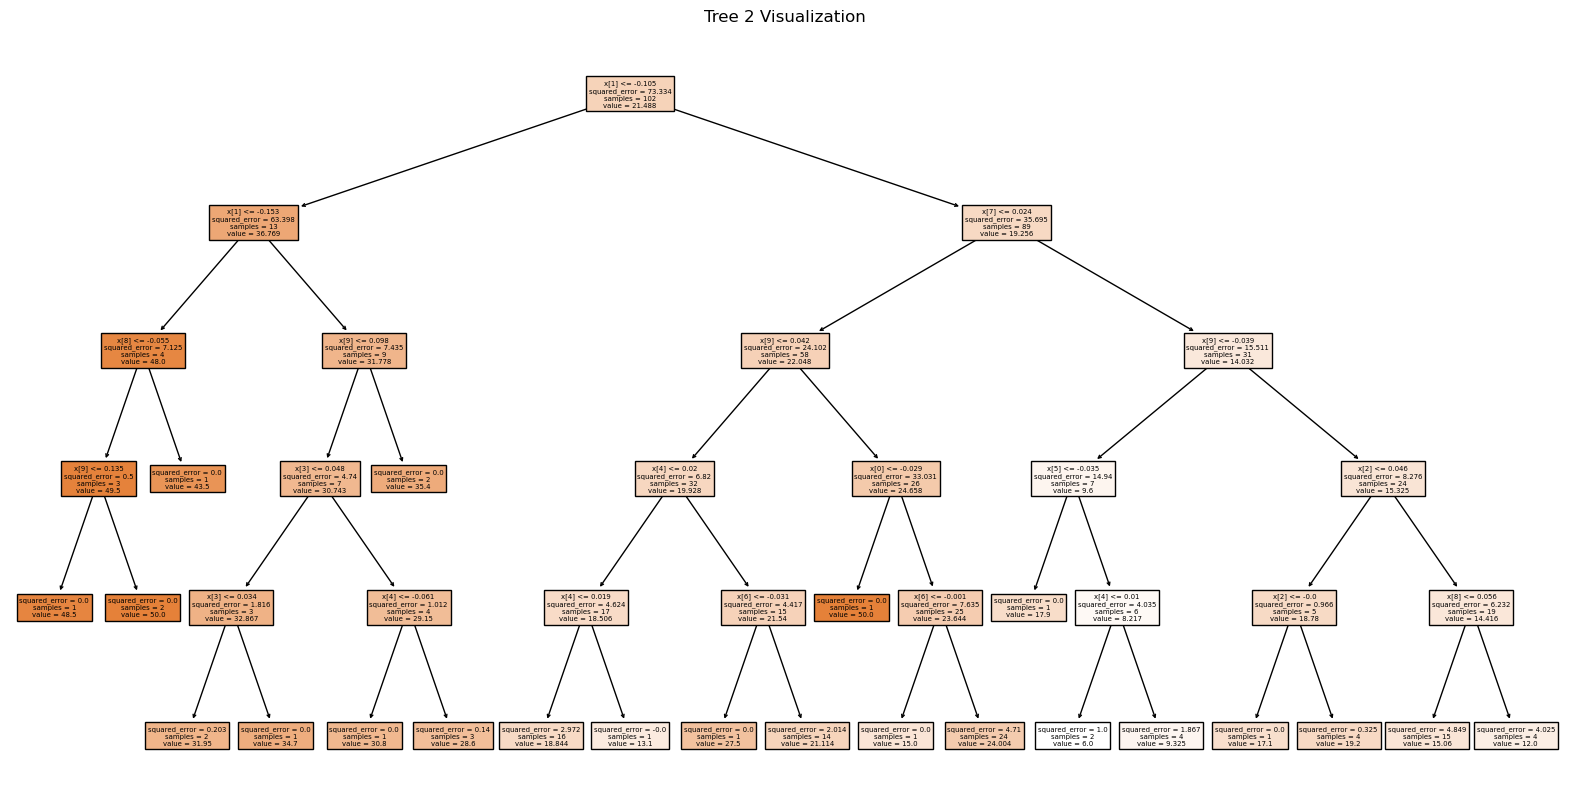

Tree 3 feature importances:
[0.09288547 0.49704149 0.01493847 0.00329316 0.01502463 0.
 0.01082382 0.18122687 0.0094048  0.17536129]
Tree 3 structure:
|--- feature_1 <= -0.11
|   |--- feature_9 <= 0.11
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_7 <= -0.05
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_7 >  -0.05
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.05
|   |   |   |   |--- feature_4 <= -0.06
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_4 >  -0.06
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|   |--- feature_9 >  0.11
|   |   |--- feature_2 <= -0.22
|   |   |   |--- feature_2 <= -0.24
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_2 >  -0.24
|   |   |   |   |--- value: [48.50]
|   |   |--- feature_2 >  -0.22
|   |   |   |--- value: [43.50]
|--- feature_1 >  -0.11
|   |--- feature_7 <= 0

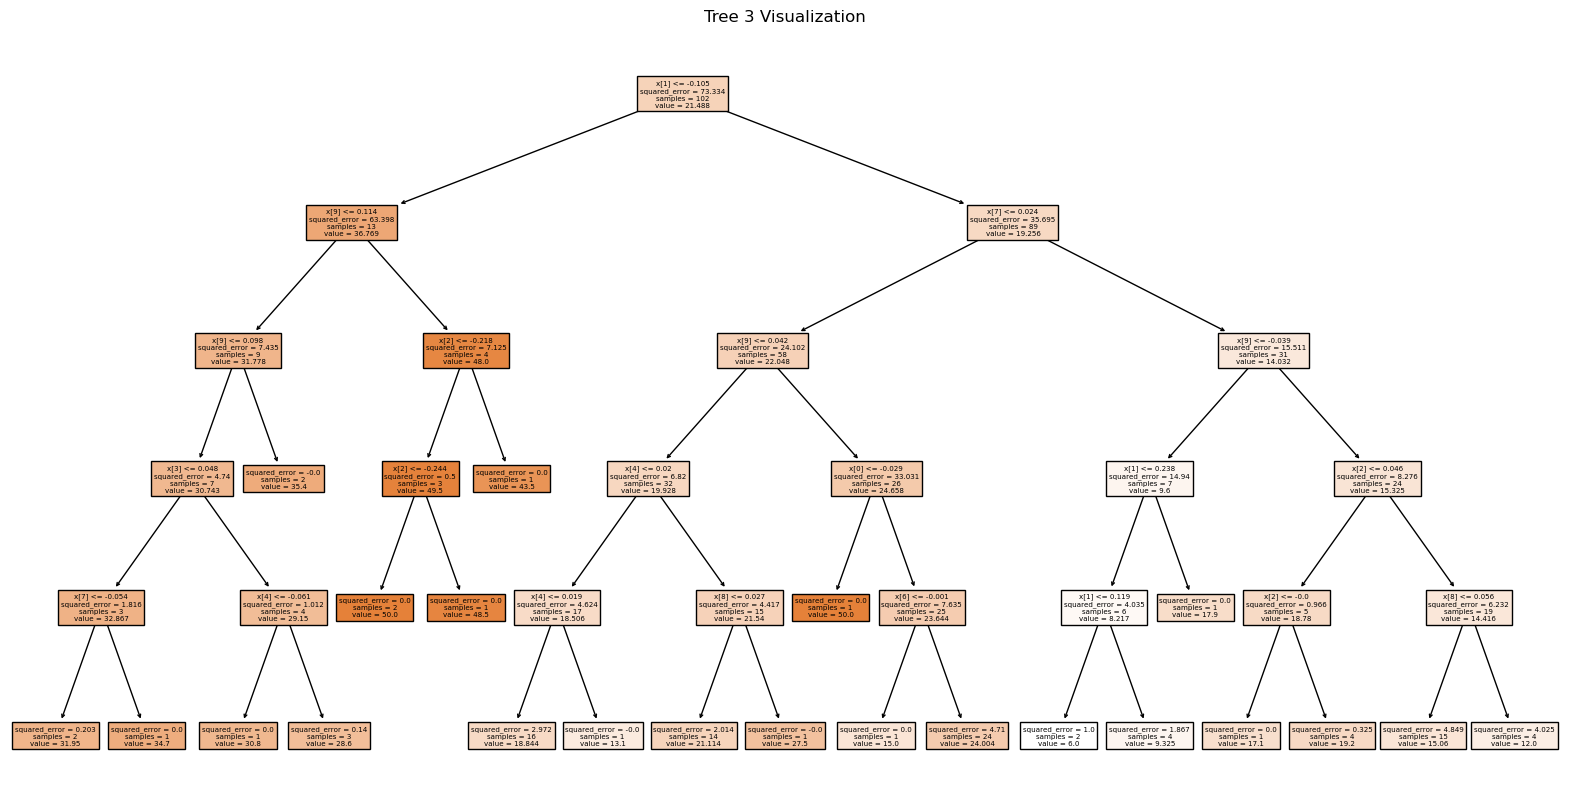

Tree 4 feature importances:
[0.09493542 0.58565008 0.01048445 0.         0.01827462 0.011177
 0.01940968 0.18194028 0.00411209 0.07401638]
Tree 4 structure:
|--- feature_1 <= -0.11
|   |--- feature_1 <= -0.15
|   |   |--- feature_4 <= -0.05
|   |   |   |--- feature_7 <= -0.08
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  -0.08
|   |   |   |   |--- value: [48.50]
|   |   |--- feature_4 >  -0.05
|   |   |   |--- value: [43.50]
|   |--- feature_1 >  -0.15
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- feature_7 <= -0.05
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_7 >  -0.05
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|--- feature_1 >  -0.11
|   |--- featur

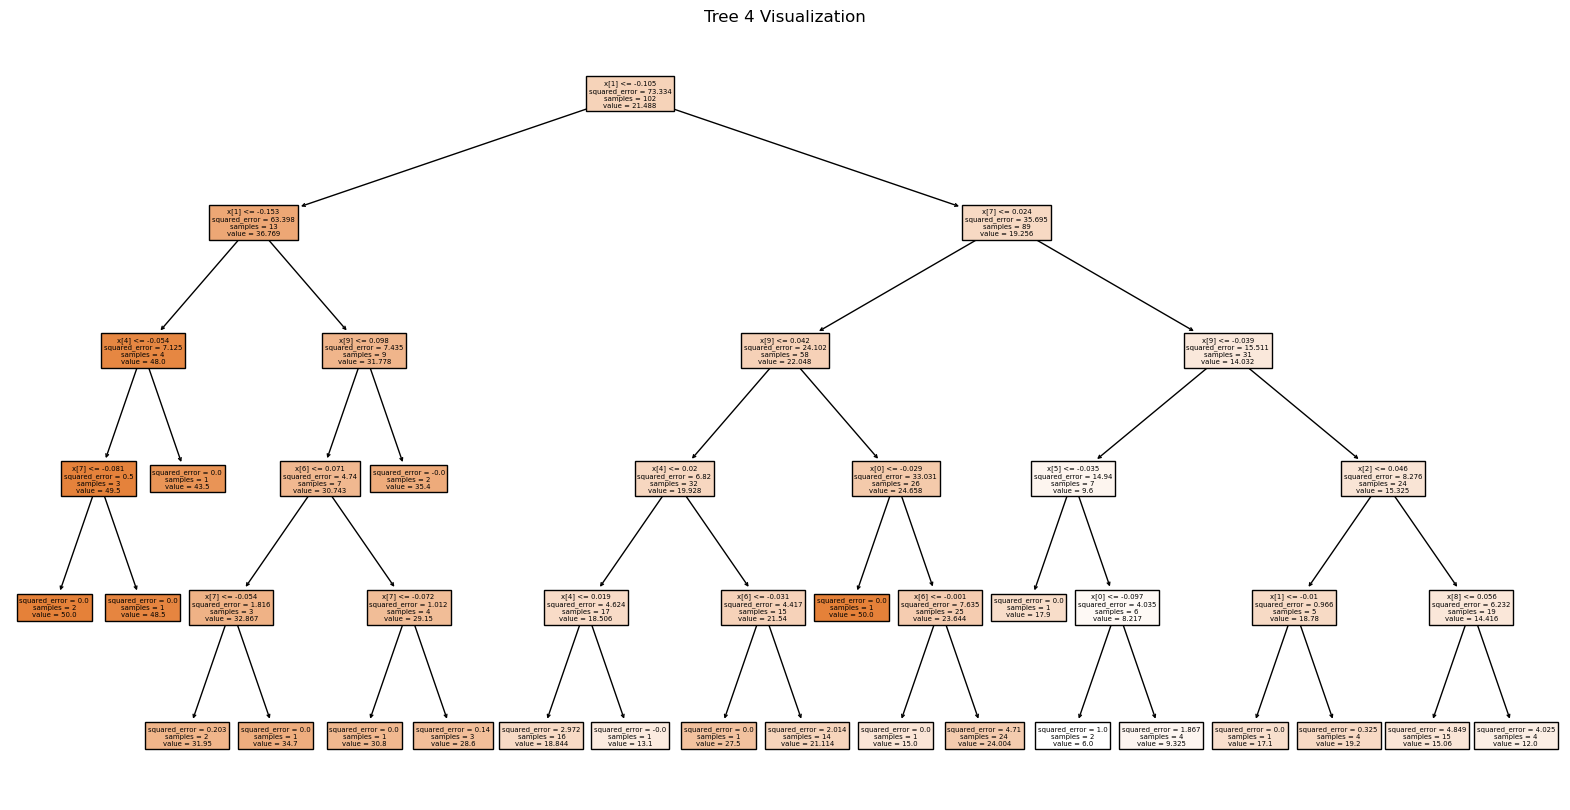

Tree 5 feature importances:
[0.10370928 0.59633645 0.01097508 0.         0.01522095 0.
 0.00858586 0.18123915 0.00786688 0.07606634]
Tree 5 structure:
|--- feature_1 <= -0.11
|   |--- feature_1 <= -0.15
|   |   |--- feature_8 <= -0.05
|   |   |   |--- feature_7 <= -0.08
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  -0.08
|   |   |   |   |--- value: [48.50]
|   |   |--- feature_8 >  -0.05
|   |   |   |--- value: [43.50]
|   |--- feature_1 >  -0.15
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- feature_4 <= -0.01
|   |   |   |   |   |--- value: [34.70]
|   |   |   |   |--- feature_4 >  -0.01
|   |   |   |   |   |--- value: [31.95]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|--- feature_1 >  -0.11
|   |--- feature_7 <=

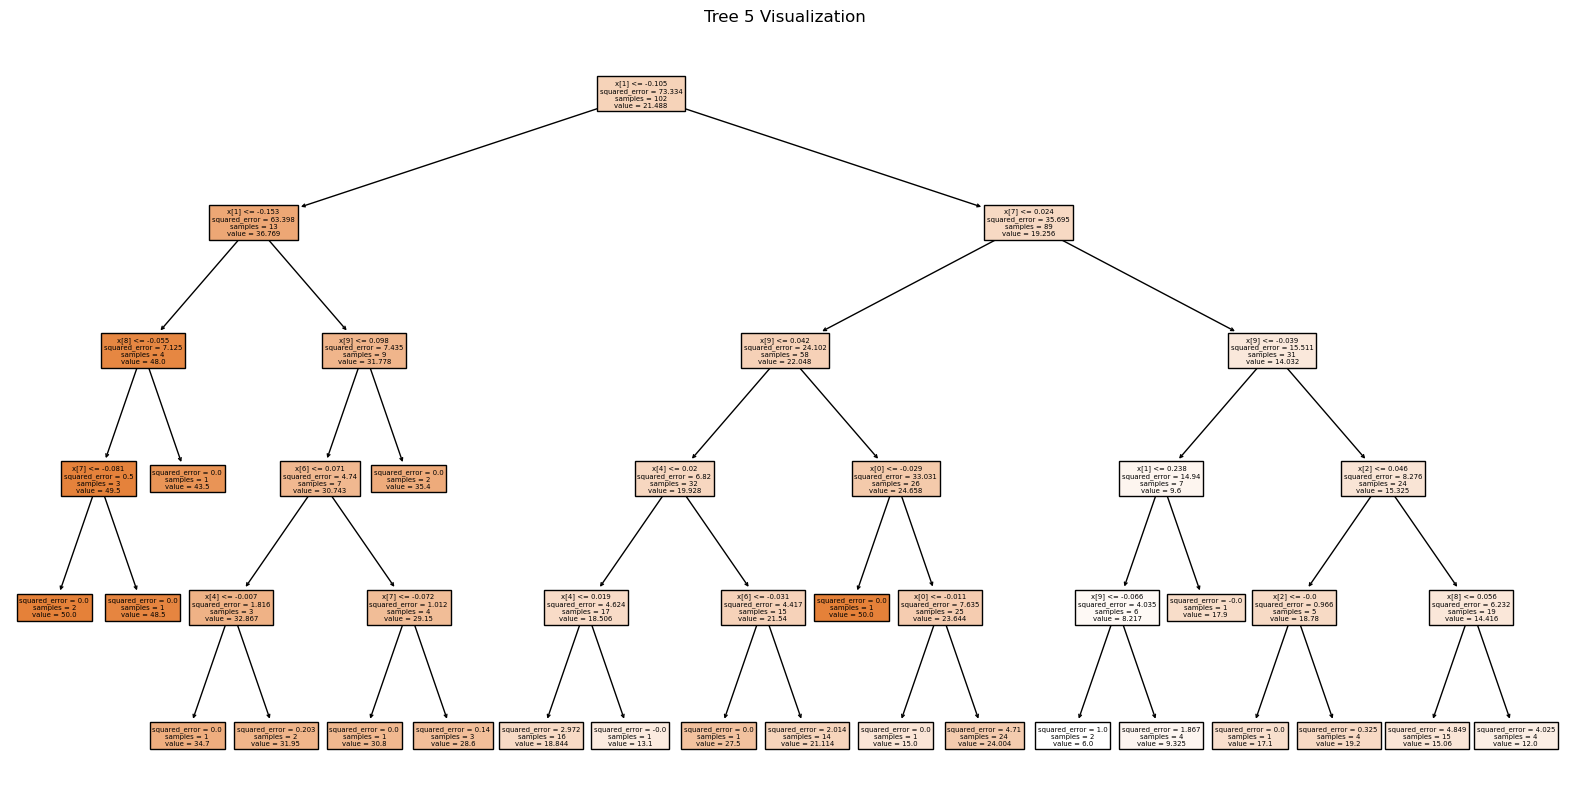

Tree 6 feature importances:
[0.01457861 0.5023342  0.01097508 0.00329316 0.01451982 0.
 0.         0.27461714 0.00411209 0.17556989]
Tree 6 structure:
|--- feature_1 <= -0.11
|   |--- feature_9 <= 0.11
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_7 <= -0.05
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_7 >  -0.05
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_3 >  0.05
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|   |--- feature_9 >  0.11
|   |   |--- feature_0 <= 0.06
|   |   |   |--- value: [43.50]
|   |   |--- feature_0 >  0.06
|   |   |   |--- feature_9 <= 0.14
|   |   |   |   |--- value: [48.50]
|   |   |   |--- feature_9 >  0.14
|   |   |   |   |--- value: [50.00]
|--- feature_1 >  -0.11
|   |--- feature_7 <= 0.02


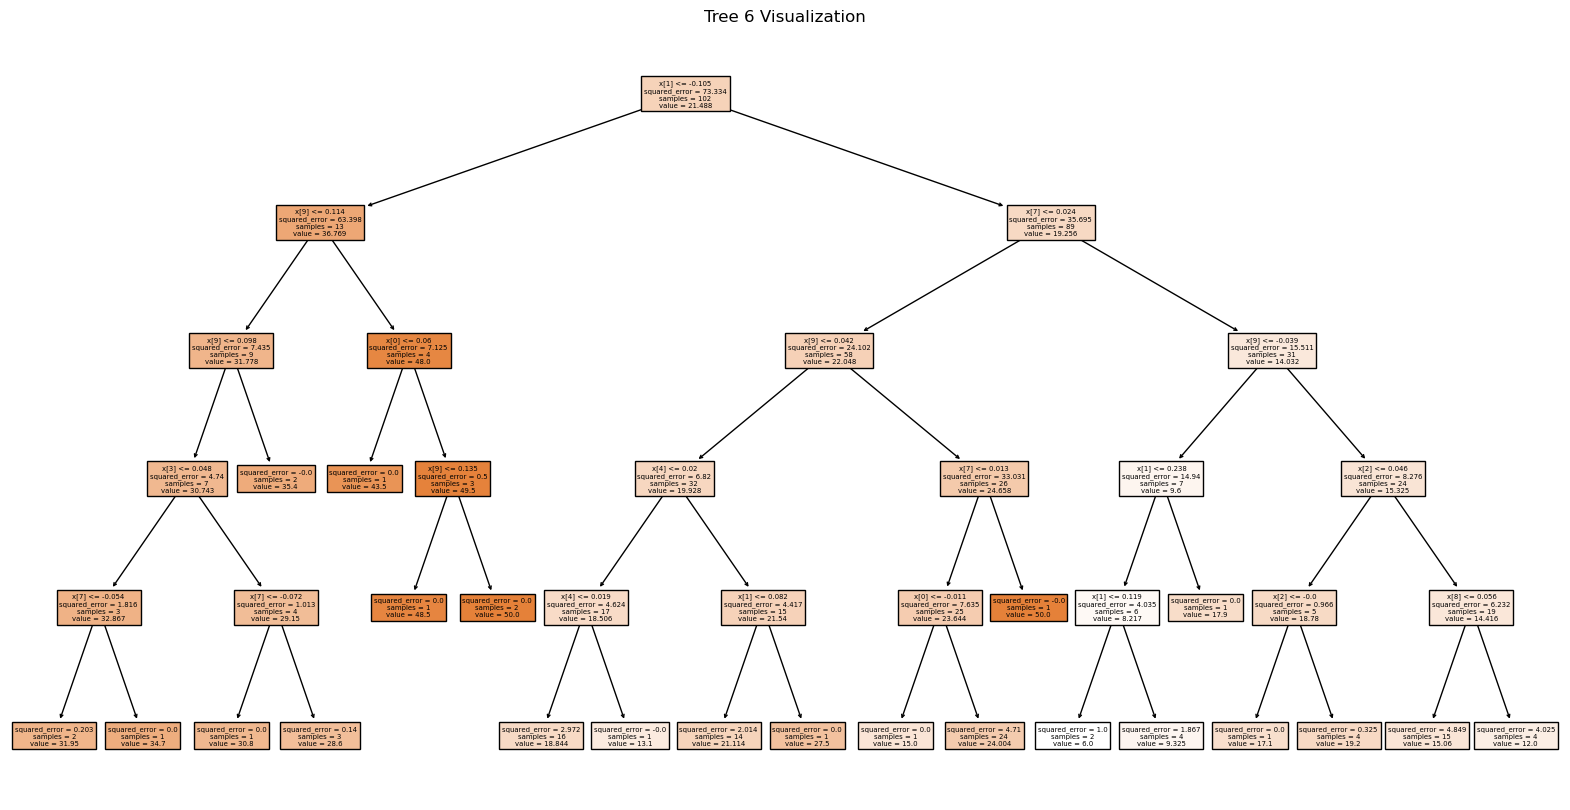

Tree 7 feature importances:
[0.00529271 0.48430517 0.01069305 0.00329316 0.0172709  0.011177
 0.         0.27391602 0.01493591 0.17911609]
Tree 7 structure:
|--- feature_1 <= -0.11
|   |--- feature_9 <= 0.11
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_4 <= -0.01
|   |   |   |   |   |--- value: [34.70]
|   |   |   |   |--- feature_4 >  -0.01
|   |   |   |   |   |--- value: [31.95]
|   |   |   |--- feature_3 >  0.05
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|   |--- feature_9 >  0.11
|   |   |--- feature_9 <= 0.12
|   |   |   |--- value: [43.50]
|   |   |--- feature_9 >  0.12
|   |   |   |--- feature_2 <= -0.24
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_2 >  -0.24
|   |   |   |   |--- value: [48.50]
|--- feature_1 >  -0.11
|   |--- feature_7 

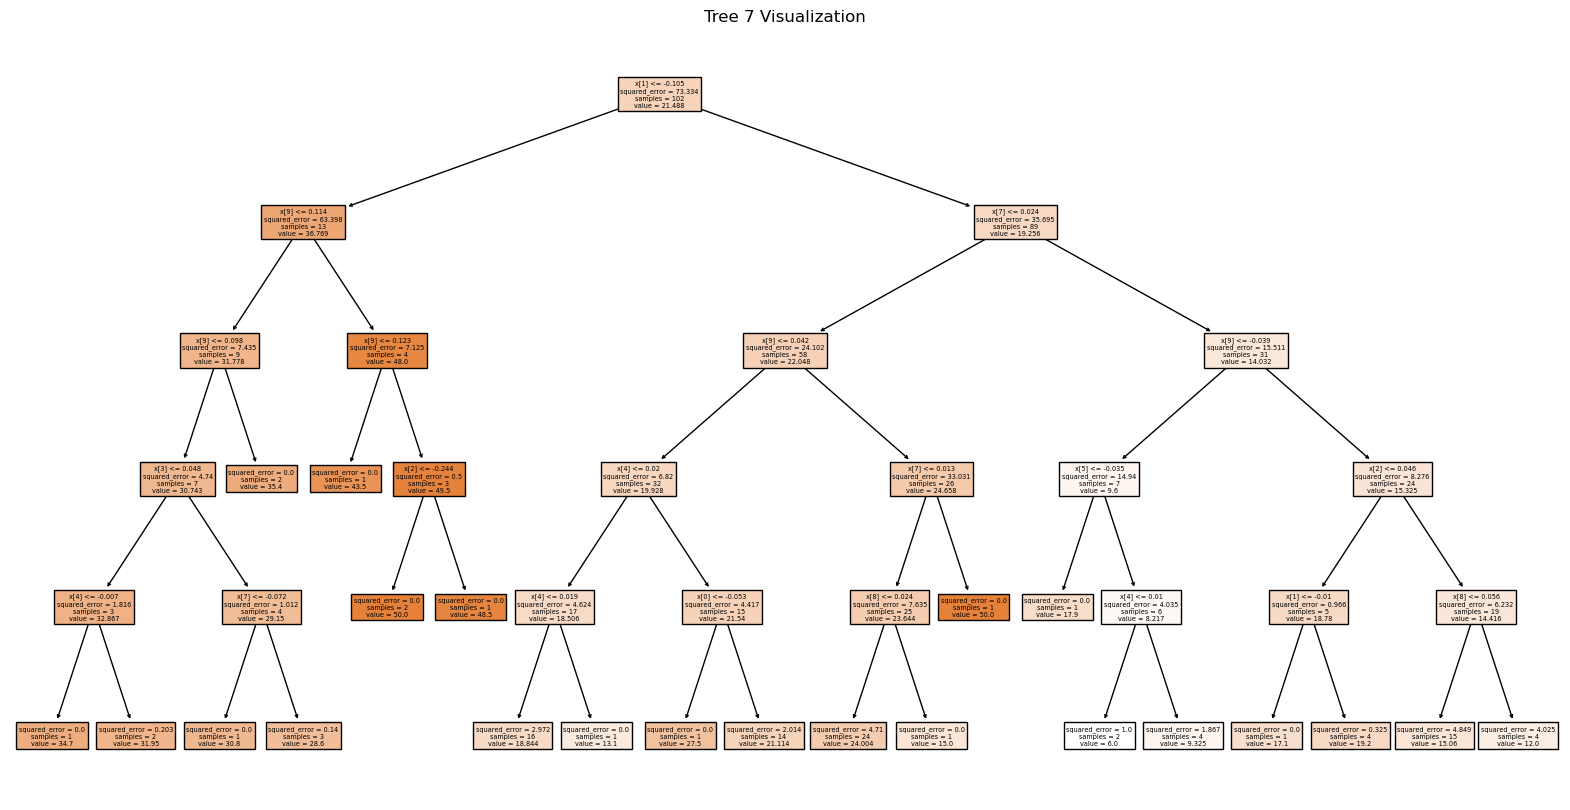

Tree 8 feature importances:
[0.10370928 0.48381455 0.01069305 0.00070113 0.01707459 0.011177
 0.00329316 0.18101637 0.01315959 0.17536129]
Tree 8 structure:
|--- feature_1 <= -0.11
|   |--- feature_9 <= 0.11
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_3 >  0.03
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- feature_4 <= -0.06
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_4 >  -0.06
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|   |--- feature_9 >  0.11
|   |   |--- feature_8 <= -0.05
|   |   |   |--- feature_2 <= -0.24
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_2 >  -0.24
|   |   |   |   |--- value: [48.50]
|   |   |--- feature_8 >  -0.05
|   |   |   |--- value: [43.50]
|--- feature_1 >  -0.11
|   |--- feature_7 

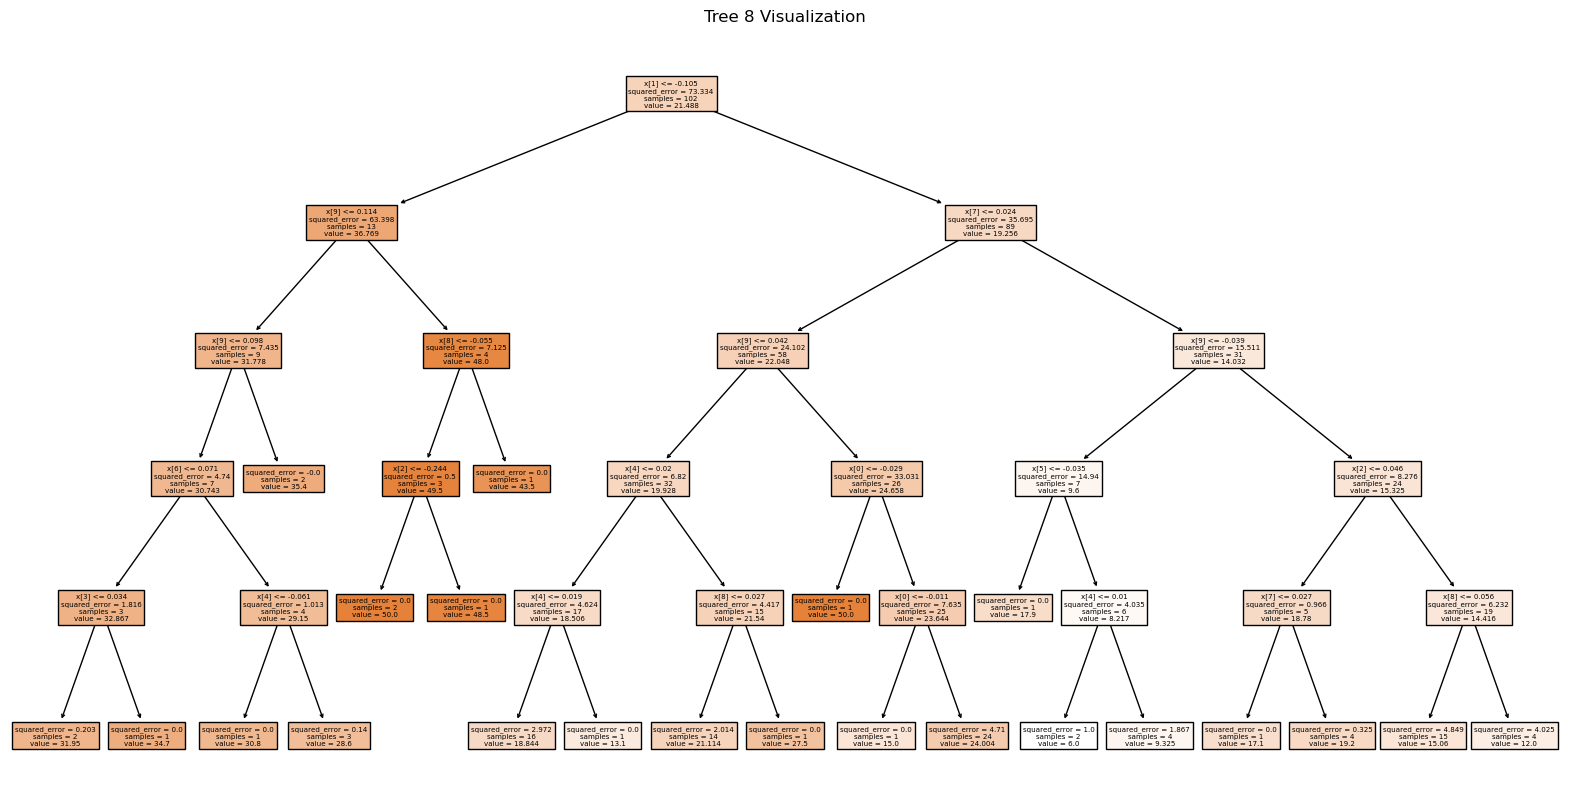

Tree 9 feature importances:
[0.01082382 0.48430517 0.01048445 0.00070113 0.01656978 0.011177
 0.00329316 0.27767081 0.0094048  0.17556989]
Tree 9 structure:
|--- feature_1 <= -0.11
|   |--- feature_9 <= 0.11
|   |   |--- feature_9 <= 0.10
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |--- value: [31.95]
|   |   |   |   |--- feature_3 >  0.03
|   |   |   |   |   |--- value: [34.70]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |--- value: [30.80]
|   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |--- value: [28.60]
|   |   |--- feature_9 >  0.10
|   |   |   |--- value: [35.40]
|   |--- feature_9 >  0.11
|   |   |--- feature_7 <= -0.08
|   |   |   |--- feature_9 <= 0.14
|   |   |   |   |--- value: [48.50]
|   |   |   |--- feature_9 >  0.14
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -0.08
|   |   |   |--- value: [43.50]
|--- feature_1 >  -0.11
|   |--- feature_7 <=

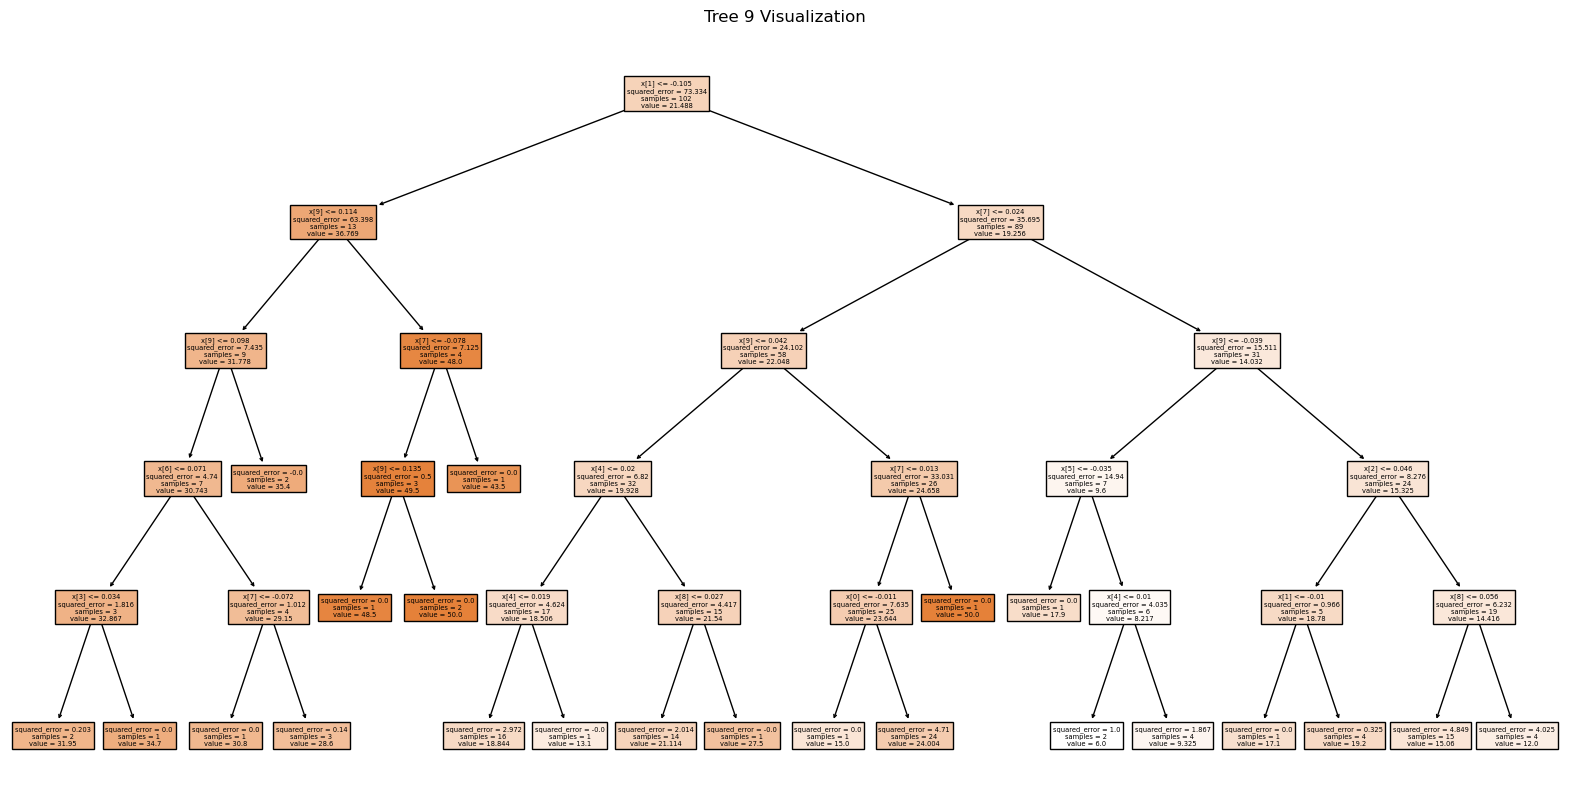

In [15]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()